# Model Training

- We will predict the Math score for this problem statement
- This is a Regression problem as our output feature is a numerical value

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((800, 7), (200, 7))

In [8]:
X_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
29,female,group D,master's degree,standard,none,70,75
535,female,group C,bachelor's degree,free/reduced,completed,83,83
695,female,group D,some college,free/reduced,none,89,86
557,male,group C,master's degree,free/reduced,none,67,66
836,male,group E,high school,standard,none,64,57


In [9]:
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

transformer = ColumnTransformer(
    [
        ("StandardScaler", scaler, num_features),
        ("OneHotEncoder", encoder, cat_features)
    ]
)

In [10]:
X_train = transformer.fit_transform(X_train)

In [11]:
X_train.shape

(800, 19)

In [12]:
X_test = transformer.transform(X_test)

In [13]:
# Model evaluation function

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

In [14]:
model = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(verbose = 0, allow_writing_files = False),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []
mae_list = []
rmse_list = []


for model_name, model in model.items():
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test predicitions
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error:", model_train_rmse)
    print("- Mean Absolute Error:", model_train_mae)
    print("- R2 Score:", model_train_r2)

    print("--------------------------------------------")

    print('Model performance for Test set')
    print("- Root Mean Squared Error:", model_test_rmse)
    print("- Mean Absolute Error:", model_test_mae)
    print("- R2 Score:", model_test_r2)
    print("============================================")
    print('\n')
    model_list.append(model_name)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)
    r2_list.append(model_test_r2)



Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.323050852720514
- Mean Absolute Error: 4.266711846071956
- R2 Score: 0.8743172040139593
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.393993869732843
- Mean Absolute Error: 4.214763142474851
- R2 Score: 0.8804332983749565


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.592500298650881
- Mean Absolute Error: 5.205260274468427
- R2 Score: 0.8072231322208645
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.517328221922998
- Mean Absolute Error: 5.155701094273798
- R2 Score: 0.8254465092551196


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.323320560617113
- Mean Absolute Error: 4.265005112727167
- R2 Score: 0.8743044675204545
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.390417574427314
- M

In [15]:
pd.DataFrame(list(zip(model_list, r2_list, rmse_list, mae_list)), columns=['Model Name', 'R2_Score', 'MAE', 'RMSE']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score,MAE,RMSE
2,Ridge,0.880592,5.390418,4.211113
0,Linear Regression,0.880433,5.393994,4.214763
5,Random Forest Regressor,0.852610,5.988796,4.601179
7,CatBoostRegressor,0.851831,6.004608,4.608758
8,AdaBoostRegressor,0.847201,6.097703,4.697788
1,Lasso,0.825447,6.517328,5.155701
6,XGBRegressor,0.821221,6.595750,5.103630
3,K-Neighbors Regressor,0.783968,7.250448,5.593000
4,Decision Tree,0.747861,7.832943,6.275000


- Ridge Regression shows the best accuracy for this dataset.
- The accuracy is 88.06% for Ridge Regression.

Text(0.5, 1.0, 'Predicted vs Actual')

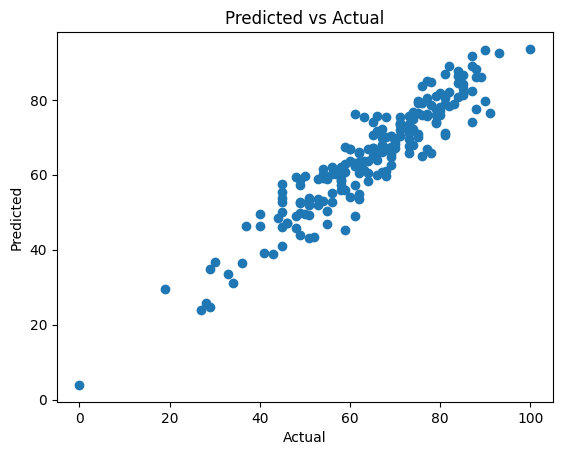

In [16]:
# Plot y_pred and y_test

RidgeRegressor = Ridge()
RidgeRegressor.fit(X_train, y_train)
y_pred = RidgeRegressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")

Text(0.5, 1.0, 'Predicted vs Actual')

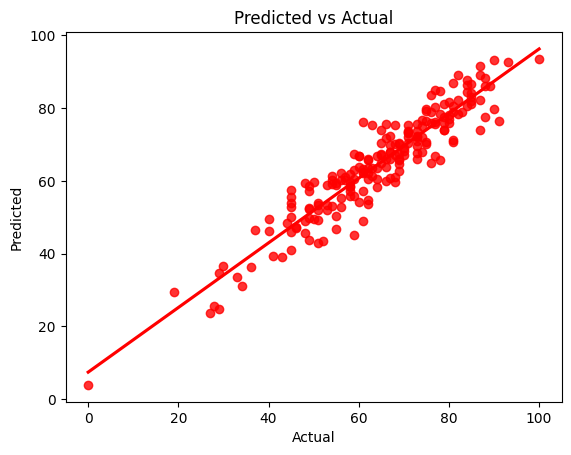

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")

In [18]:
# Data Frame of Predicated and Actual values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398746,14.601254
737,53,58.843165,-5.843165
740,80,76.992035,3.007965
660,74,76.806200,-2.806200
411,84,87.614981,-3.614981
...,...,...,...
408,52,43.491767,8.508233
332,62,62.170101,-0.170101
208,74,67.910260,6.089740
613,65,67.061256,-2.061256
